## Data preprocessing

Loading and Initial Exploration of the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
display(data.info())
display(data.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   object 
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   object 
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2558 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2187 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2686 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio               

None

Country                             183
Year                                 16
Status                                2
Life expectancy                     359
Adult Mortality                     422
infant deaths                       203
Alcohol                            1043
percentage expenditure             2177
Hepatitis B                          87
Measles                             926
BMI                                 593
under-five deaths                   248
Polio                                73
Total expenditure                   798
Diphtheria                           81
HIV/AIDS                            200
GDP                                2311
Population                         2098
thinness  1-19 years                200
thinness 5-9 years                  207
Income composition of resources     613
Schooling                           173
dtype: int64

Converting Object Columns to Categorical Numeric Codes

In [3]:
object_columns = data.select_dtypes(['object']).columns
data[object_columns] = data[object_columns].astype('category').apply(lambda x: x.cat.codes)

In [4]:
display(data.head())
display(data.info())

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   int16  
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   int8   
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2558 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2187 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2686 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio               

None

Identifying Missing Values and Selecting Columns for Analysis

In [5]:
print(data.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            160
percentage expenditure               0
Hepatitis B                        531
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  192
Diphtheria                          19
HIV/AIDS                             0
GDP                                407
Population                         614
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    148
Schooling                          148
dtype: int64


In [6]:
columns_to_check = [
    "Alcohol", "Hepatitis B", "BMI", "Polio", "Total expenditure", "Diphtheria",
    "GDP", "Population", "thinness  1-19 years", "thinness 5-9 years",
    "Income composition of resources", "Schooling"
]

Splitting the Dataset into Training and Testing Sets

In [7]:
from sklearn.model_selection import train_test_split

random_seed = 42

Xtrain, Xtest, ytrain, ytest = train_test_split(data.drop(columns=['Life expectancy']), data['Life expectancy'], test_size=0.4, random_state=random_seed)

print(Xtrain.shape)
print(ytrain.shape)

print(Xtest.shape)
print(ytest.shape)

(1630, 21)
(1630,)
(1088, 21)
(1088,)


- Implemented the `fill_missing_values` function to handle missing values in selected columns (`columns_to_check`).
- Missing values in `Xtrain` are imputed in the following order:
  1. Grouped by `Country` and filled with the country-wise mean.
  2. If still missing, filled with the mean grouped by `Year` and `Status`.
  3. As a fallback, filled with the overall mean of the column.
- Missing values in `Xtest` are imputed using:
  1. Country-wise means from the training set.
  2. Year and status-wise means (from the training set) when applicable.
  3. Overall mean from the training set as a final fallback.

In [8]:
def fill_missing_values(Xtrain, Xtest, columns_to_check):
    for column in columns_to_check:
        country_means = Xtrain.groupby('Country')[column].transform('mean')
        Xtrain[column] = Xtrain[column].fillna(country_means)
        if Xtrain[column].isnull().sum() > 0:
            year_status_means = Xtrain.groupby(['Year', 'Status'])[column].transform('mean')
            Xtrain[column] = Xtrain[column].fillna(year_status_means)
        if Xtrain[column].isnull().sum() > 0:
            overall_mean = Xtrain[column].mean()
            Xtrain[column] = Xtrain[column].fillna(overall_mean)

    for column in columns_to_check:
        country_means = Xtrain.groupby('Country')[column].mean()
        Xtest[column] = Xtest[column].fillna(
            Xtest['Country'].map(country_means)
        )
        if Xtest[column].isnull().sum() > 0:
            year_status_means = Xtrain.groupby(['Year', 'Status'])[column].mean()
            Xtest[column] = Xtest[column].fillna(
                Xtest[['Year', 'Status']].apply(
                    lambda row: year_status_means.loc[row['Year'], row['Status']] 
                    if (row['Year'], row['Status']) in year_status_means.index 
                    else np.nan, axis=1
                )
            )
        
        if Xtest[column].isnull().sum() > 0:
            overall_mean = Xtrain[column].mean()
            Xtest[column] = Xtest[column].fillna(overall_mean)

    return Xtrain, Xtest


Xtrain, Xtest = fill_missing_values(Xtrain, Xtest, columns_to_check)

print("\nFinal Missing Values in Training Data:")
print(Xtrain[columns_to_check].isnull().sum())

print("\nFinal Missing Values in Test Data:")
print(Xtest[columns_to_check].isnull().sum())


Final Missing Values in Training Data:
Alcohol                            0
Hepatitis B                        0
BMI                                0
Polio                              0
Total expenditure                  0
Diphtheria                         0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

Final Missing Values in Test Data:
Alcohol                            0
Hepatitis B                        0
BMI                                0
Polio                              0
Total expenditure                  0
Diphtheria                         0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


Further Splitting of the Testing Set into Validation and Final Testing Sets

In [9]:
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=random_seed) 

print(Xval.shape)
print(yval.shape)

print(Xtest.shape)
print(ytest.shape)

(544, 21)
(544,)
(544, 21)
(544,)


In [10]:
Xval.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
63,4,2004,1,149.0,0,7.28,22.862952,97.0,0,4.8,...,97.0,4.21,97.0,0.1,1352.837400,1.515610e+07,3.5,3.4,0.000,0.0
1286,87,2013,1,83.0,1,0.01,2792.677582,99.0,62,7.2,...,99.0,2.56,99.0,0.1,48399.958100,1.194161e+07,3.4,3.3,0.796,13.1
2112,143,2005,1,48.0,30,3.83,42.088929,77.0,29,19.2,...,67.0,12.25,65.0,2.2,287.689194,5.658379e+06,9.3,9.3,0.341,7.8
2234,151,2011,0,63.0,1,9.62,4873.818800,97.0,3802,64.1,...,97.0,9.48,97.0,0.1,31834.218160,4.674270e+07,0.6,0.5,0.867,16.9
2069,140,2006,1,236.0,23,0.34,10.430226,89.0,3,19.9,...,89.0,5.44,89.0,0.7,89.838296,1.155676e+07,11.2,11.1,0.422,6.6


In [11]:
## Random Forest

Defined a `CustomRandomForest` class to implement a simplified random forest regressor using `DecisionTreeRegressor`.

In [12]:
from sklearn.tree import DecisionTreeRegressor

class CustomRandomForest:
    def __init__(self, n_estimators=100, max_samples=1.0, max_depth=None, random_state=42, **kwargs):
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.max_depth = max_depth
        self.random_state = random_state
        self.kwargs = kwargs
        self.trees = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.trees = []
        n_samples = X.shape[0]

        for _ in range(self.n_estimators):
            if self.max_samples <= 1:  
                sample_size = int(self.max_samples * n_samples)
            else: 
                sample_size = int(self.max_samples)

            bootstrap_indices = np.random.choice(n_samples, size=sample_size, replace=True)
            X_sample = X.iloc[bootstrap_indices]
            y_sample = y.iloc[bootstrap_indices]
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state, **self.kwargs)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        ypredicted = np.mean(predictions, axis=0)
        return ypredicted

### Hyperparameter Tuning for Custom Random Forest

- Defined a `param_grid` for grid search, including:
  - Number of trees (`n_estimators`), sample size (`max_samples`), and tree depth (`max_depth`).
- Used `ParameterGrid` to generate all possible combinations of hyperparameters.
- For each parameter combination:
  1. Trained a `CustomRandomForest` on the training data.
  2. Evaluated it on the validation set (`Xval`, `yval`) using RMSE and MAE metrics.
  - Stored results for all parameter combinations.
- Identified the best hyperparameter set with the lowest RMSE on the validation set.
- Printed the best parameters and their corresponding RMSE and MAE values.

In [13]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.model_selection import ParameterGrid
import numpy as np

param_grid = {
    'n_estimators': range(25, 95, 5),
    'max_samples': [0.8, 0.9, 1.0],
    'max_depth': range(4, 20, 4)
}
parameter_combinations = list(ParameterGrid(param_grid))
results = {'params': [], 'rmse': [], 'mae': []}

for parameters in parameter_combinations:
    forest = CustomRandomForest(
        n_estimators=parameters['n_estimators'],
        max_samples=parameters['max_samples'],
        max_depth=parameters['max_depth'],
        random_state=155  
    )
    
    forest.fit(Xtrain, ytrain)
    predictions = forest.predict(Xval)
    
    rmse = root_mean_squared_error(yval, predictions)
    mae = mean_absolute_error(yval, predictions)
    
    results['params'].append(parameters)
    results['rmse'].append(rmse)
    results['mae'].append(mae)

best_idx = np.argmin(results['rmse'])
best_parameters = results['params'][best_idx]

print(f"Best parameters: {best_parameters}")
print(f"Validation RMSE (best): {results['rmse'][best_idx]:.5f}")
print(f"Validation MAE (best): {results['mae'][best_idx]:.5f}")

Best parameters: {'max_depth': 16, 'max_samples': 1.0, 'n_estimators': 90}
Validation RMSE (best): 1.92322
Validation MAE (best): 1.22903


Training the Best Random Forest Model

In [14]:
best_forest = CustomRandomForest(
    n_estimators=best_parameters['n_estimators'],
    max_samples=best_parameters['max_samples'],
    max_depth=best_parameters['max_depth'],
    random_state=155
)

best_forest.fit(Xtrain, ytrain)

Error Distribution Analysis

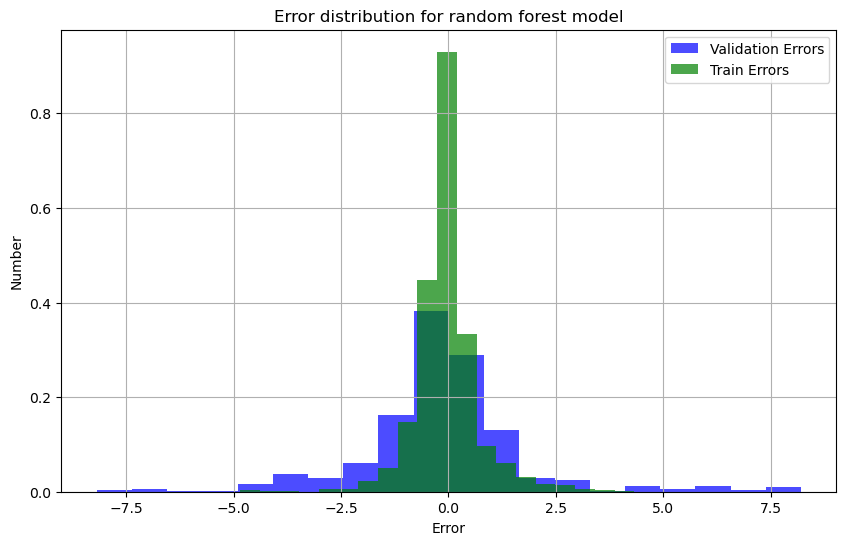

In [15]:
yval_pred = best_forest.predict(Xval)
ytrain_pred = best_forest.predict(Xtrain)

val_errors = yval - yval_pred
train_errors = ytrain - ytrain_pred

plt.figure(figsize=(10, 6))

plt.hist(val_errors, bins=20, alpha=0.7, label='Validation Errors', color='blue', density=True)
plt.hist(train_errors, bins=20, alpha=0.7, label='Train Errors', color='green', density=True)

plt.title('Error distribution for random forest model')
plt.xlabel('Error')
plt.ylabel('Number')
plt.legend()
plt.grid()
plt.show()

The validation error distribution being wider suggests some degree of overfitting: the model performs slightly better on training data than on unseen validation data.
However, the central alignment of both histograms around zero suggests that the model’s predictions are unbiased overall.

 ## LinearRegression

Scaling Features Using StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xval_scaled = scaler.transform(Xval)
XTrain_scaled = scaler.transform(Xtrain)

Training a Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(Xtrain_scaled, ytrain)

yval_pred = lr_model.predict(Xval_scaled)
ytrain_pred = lr_model.predict(XTrain_scaled)

Evaluating Linear Regression Performance

In [18]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

def evaluate_model(y_true, y_pred):
    rmse = root_mean_squared_error(y_true, y_pred) 
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae

rmse_val, mae_val = evaluate_model(yval, yval_pred)
print(f"Validation RMSE: {rmse_val:.5f}, MAE: {mae_val:.5f}")

rmse_train, mae_train = evaluate_model(ytrain, ytrain_pred)
print(f"Train RMSE: {rmse_train:.5f}, MAE: {mae_train:.5f}")


Validation RMSE: 4.31521, MAE: 3.25882
Train RMSE: 3.92991, MAE: 2.97573


Visualizing True vs Predicted Values

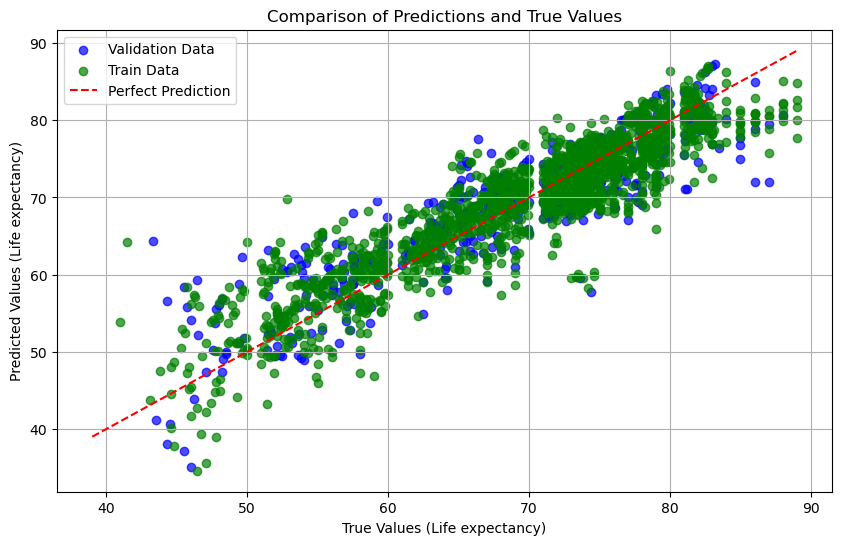

In [19]:
plt.figure(figsize=(10, 6))

y = data['Life expectancy']

plt.scatter(yval, yval_pred, alpha=0.7, label='Validation Data', color='blue')
plt.scatter(ytrain, ytrain_pred, alpha=0.7, label='Train Data', color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')

plt.title('Comparison of Predictions and True Values')
plt.xlabel('True Values (Life expectancy)')
plt.ylabel('Predicted Values (Life expectancy)')
plt.legend()
plt.grid()
plt.show()

This indicates that the model predictions closely match the true values for life expectancy.

Error Distribution Analysis for Linear Regression Model:

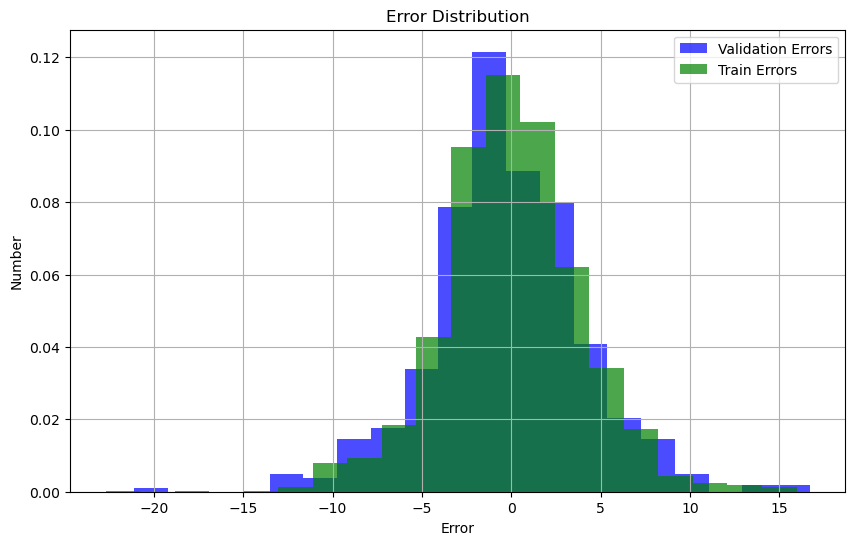

In [20]:
val_errors = yval - yval_pred
train_errors = ytrain - ytrain_pred

plt.figure(figsize=(10, 6))

plt.hist(val_errors, bins=20, alpha=0.7, label='Validation Errors', color='blue', density=True)
plt.hist(train_errors, bins=20, alpha=0.7, label='Train Errors', color='green', density=True)

plt.title('Error Distribution')
plt.xlabel('Error')
plt.ylabel('Number')
plt.legend()
plt.grid()
plt.show()

The errors for both the training set (green) and validation set (blue) are roughly symmetric and centered around zero.
This indicates that the model has no significant bias (systematic error), and predictions are generally well-balanced.

## KNN

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 21), 
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(Xtrain_scaled, ytrain)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}


Training the Best K-Nearest Neighbors (KNN) Model:

In [22]:
best_knn = KNeighborsRegressor(**best_params)
best_knn.fit(Xtrain_scaled, ytrain)

yval_pred = best_knn.predict(Xval_scaled)

Evaluating KNN Model Performance on the Validation Set:

In [23]:
def evaluate_model(y_true, y_pred):
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae

rmse_val, mae_val = evaluate_model(yval, yval_pred)

print(f"Validation RMSE: {rmse_val:.5f}, MAE: {mae_val:.5f}")

Validation RMSE: 2.01084, MAE: 1.18466


Error Distribution for kNN Regression Model

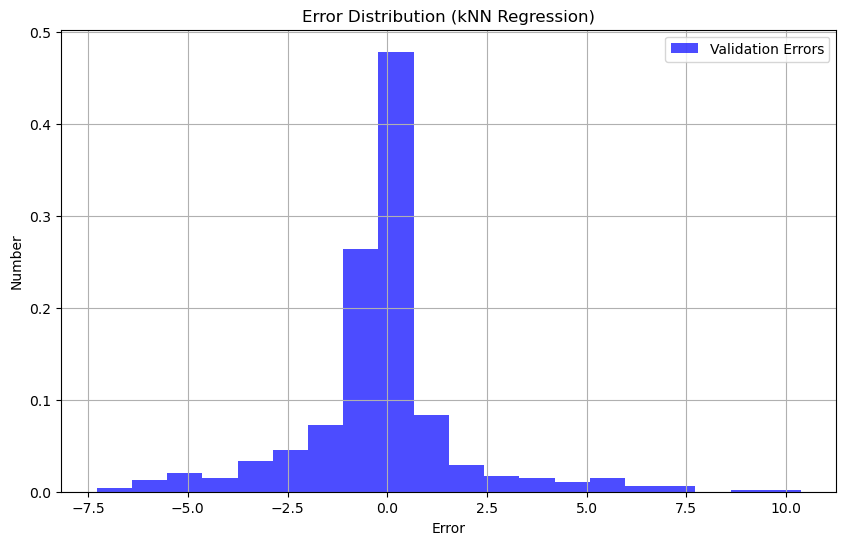

In [24]:
val_errors = yval - yval_pred
train_errors = ytrain - ytrain_pred

plt.figure(figsize=(10, 6))

plt.hist(val_errors, bins=20, alpha=0.7, label='Validation Errors', color='blue', density=True)

plt.title('Error Distribution (kNN Regression)')
plt.xlabel('Error')
plt.ylabel('Number')
plt.legend()
plt.grid()
plt.show()

The peak of the validation errors is concentrated around 0, indicating that the kNN model’s predictions are mostly accurate.
The strong central peak suggests the majority of errors are very small, which is a good sign.

## Final model

- The **Random Forest model** was selected as the final model because it achieved the **lowest RMSE** on the validation set compared to other models.

In [28]:
ytest_pred = best_forest.predict(Xtest)
rmse_test, mae_test = evaluate_model(ytest_pred, ytest)

print(f"Validation RMSE: {rmse_test:.5f}, MAE: {mae_test:.5f}")

Validation RMSE: 1.87034, MAE: 1.22128


Generating Predictions and Saving Results

In [29]:
import pandas as pd

eval_data = pd.read_csv('evaluation.csv')

object_columns = eval_data.select_dtypes(['object']).columns
eval_data[object_columns] = eval_data[object_columns].astype('category').apply(lambda x: x.cat.codes)

Xtrain, eval_data = fill_missing_values(Xtrain, eval_data, columns_to_check)

predictions = best_forest.predict(eval_data)

country_mapping = pd.read_csv('evaluation.csv')['Country'].astype('category')
eval_data['Country'] = country_mapping

eval_data['Life expectancy'] = predictions

result_df = eval_data[['Country', 'Year', 'Life expectancy']]
result_df.to_csv('results.csv', index=False)

result_df.head()

,Country,Year,Life expectancy
0,Albania,2015,75.872648
1,Albania,2014,75.278852
2,Albania,2013,75.465791
3,Albania,2012,75.288402
4,Albania,2011,75.305839
